## Chargement des données de santé

In [87]:
import numpy as np 

donnees_sante = np.genfromtxt("donnees_risque_maladie.csv", delimiter=",")
nLig, nCol = donnees_sante.shape
print(f"On a {nLig} lignes et {nCol} colonnes")

On a 918 lignes et 12 colonnes


# Exercices

Voir le sujet donné sur papier

In [88]:
#données d'entraînement du modèle, environ 3/4 des 80% des données de santé
train_data = donnees_sante[:550,0:11]
train_label = donnees_sante[:550,-1] 
print(train_data.shape)
print(train_label.shape)

#données de validation, environ 1/4 de 80% des données de santé, permet d'ajuster les hyperparamètres
validation_data = donnees_sante[550:734,0:11]
validation_label = donnees_sante[550:734,-1] 
print(validation_data.shape)
print(validation_label.shape)

(550, 11)
(550,)
(184, 11)
(184,)


In [89]:
#données de test, environ 20%, permet de vérifier notre modèle avec des données qu'il n'a jamais vu
test_data = donnees_sante[734:,0:11]
test_label = donnees_sante[673415:,-1] 
print(test_data.shape)
print(test_label.shape)

(184, 11)
(0,)


In [90]:
#pour que chaque paramètre ai autant d'impact pour le modèle
mean = train_data.mean(axis=0) #calcul la moyenne pour chaque colonne
std = train_data.std(axis=0) #calcul l'écart type de chaque colonne

#données de training
train_data -= mean
train_data /= std

#données de validation
validation_data -= mean
validation_data /= std

#données de test
test_data -= mean
test_data /= std

In [247]:
#essayer pour différents hyperparamètres : nbr de couches, nbr de neurones, nbr d'epochs, batch size

#importation des bibliothèques
from tensorflow import keras
from tensorflow.keras import layers

#construction du modèle
#nbr de neurones en puissance de 2

def get_model():
    model = keras.Sequential([
        layers.Dense(4, activation="relu"), #relu(x)=max(x, 0)
        layers.Dense(2, activation="relu"), #relu(x)=max(x, 0)
        layers.Dense(1, activation="sigmoid") #binaire => sigmoid et un seul neurone
    ])
    #compilation du modèle
    model.compile(optimizer="rmsprop", #détermine comment le "learning" progresse
                  loss="binary_crossentropy", #définie le feedback utilisé pour "learning", classification binaire
                  metrics=["accuracy"]) #évalue la performance du modèle
    return model

model = get_model()
"""
def get_model(n_layers=2, n_neurons=32):
    model = keras.Sequential()
    for _ in range(n_layers):
        model.add(layers.Dense(n_neurons, activation="relu"))
    model.add(layers.Dense(1, activation="sigmoid"))

    model.compile(optimizer="rmsprop",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

# Exemple d'utilisation
model = get_model(n_layers=1, n_neurons=32)  # Réseau plus petit
"""


#entraînement du modèle
history = model.fit(
    train_data,train_label,
    epochs=50,#nbr d'itérations
    batch_size=20, #taille d'un lot d'entraînement, prendre un batch de petite taille
    validation_data=(validation_data, validation_label))

Epoch 1/50
28/28 [==============================] - 1s 7ms/step - loss: 0.6755 - accuracy: 0.6509 - val_loss: 0.7672 - val_accuracy: 0.6359
Epoch 2/50
28/28 [==============================] - 0s 3ms/step - loss: 0.6178 - accuracy: 0.6891 - val_loss: 0.7150 - val_accuracy: 0.6522
Epoch 3/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5742 - accuracy: 0.7236 - val_loss: 0.6722 - val_accuracy: 0.6576
Epoch 4/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5388 - accuracy: 0.7418 - val_loss: 0.6351 - val_accuracy: 0.6685
Epoch 5/50
28/28 [==============================] - 0s 3ms/step - loss: 0.5088 - accuracy: 0.7691 - val_loss: 0.6053 - val_accuracy: 0.7228
Epoch 6/50
28/28 [==============================] - 0s 3ms/step - loss: 0.4837 - accuracy: 0.7855 - val_loss: 0.5807 - val_accuracy: 0.7500
Epoch 7/50
28/28 [==============================] - 0s 3ms/step - loss: 0.4624 - accuracy: 0.8091 - val_loss: 0.5607 - val_accuracy: 0.7554
Epoch 8/50
28/28 [==

In [248]:
model.summary()

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 4)                 48        
                                                                 
 dense_211 (Dense)           (None, 2)                 10        
                                                                 
 dense_212 (Dense)           (None, 1)                 3         
                                                                 
Total params: 61 (244.00 Byte)
Trainable params: 61 (244.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


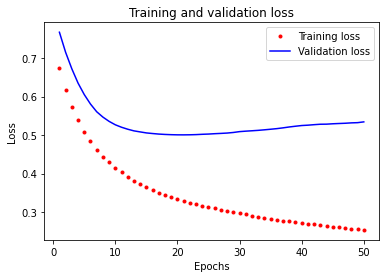

In [249]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r.", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

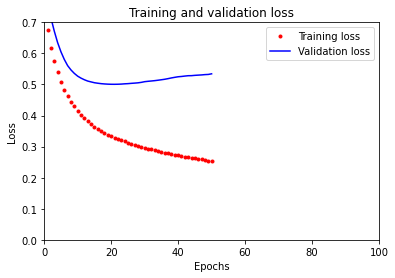

In [250]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r.", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim(0,0.7)
plt.xlim(0,100)
plt.legend()
plt.show()

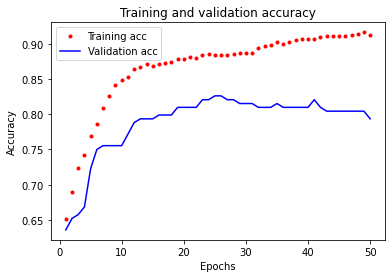

In [251]:
plt.clf()

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

plt.plot(epochs, acc, "r.", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [204]:
import numpy as np

model = get_model()
model.fit(train_data, train_label, epochs=40, batch_size=32, verbose=0)

predictions = model(test_data)
predictions = predictions.numpy()
predicted_labels = np.argmax(predictions, axis=1)

# Ensure test_label is a numpy array and convert it if it's one-hot encoded
if type(test_label) != np.ndarray:
    test_label = np.array(test_label)
if test_label.ndim == 2:  # Assuming one-hot encoding if 2D
    test_label = np.argmax(test_label, axis=1)

# Check shapes and types if still encountering issues
# print(predicted_labels.shape, test_label.shape)
# print(type(predicted_labels), type(test_label))

matches = predicted_labels == test_label
print(f"accuracy: {matches.mean():.2f}")


<ipython-input-204-c3f6663027ff>:20: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  matches = predicted_labels == test_label


AttributeError: 'bool' object has no attribute 'mean'

In [ ]:
nouvelle_patiente = np.array([[1,122,70,27,0,36.8,0.34,27]])
nouvelle_patiente -= mean
nouvelle_patiente /= std
prediction = model(nouvelle_patiente)
prediction = prediction.numpy()
prediction

In [127]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 200
all_loss_histories = []
all_val_loss_histories = []
all_acc_histories = []
all_val_acc_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_labels = train_label[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_labels = np.concatenate(
        [train_label[:i * num_val_samples],
         train_label[(i + 1) * num_val_samples:]],
        axis=0)
    model = get_model()
    history = model.fit(partial_train_data, partial_train_labels,
                        validation_data=(val_data, val_labels),
                        epochs=num_epochs, batch_size=32, verbose=0)
    all_loss_histories.append(history.history["loss"])
    all_val_loss_histories.append(history.history["val_loss"])
    all_acc_histories.append(history.history["accuracy"])
    all_val_acc_histories.append(history.history["val_accuracy"])
    
    
    average_loss = [
    np.mean([x[i] for x in all_loss_histories]) for i in range(num_epochs)]
average_val_loss = [
    np.mean([x[i] for x in all_val_loss_histories]) for i in range(num_epochs)]
average_acc = [
    np.mean([x[i] for x in all_acc_histories]) for i in range(num_epochs)]
average_val_acc = [
    np.mean([x[i] for x in all_val_acc_histories]) for i in range(num_epochs)]

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


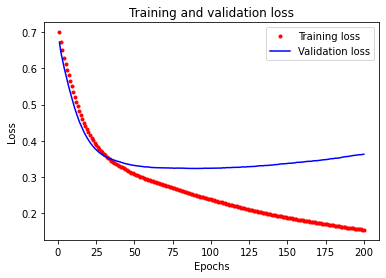

In [128]:
import matplotlib.pyplot as plt
epochs = range(1, len(average_loss) + 1)
plt.plot(epochs, average_loss, "r.", label="Training loss")
plt.plot(epochs, average_val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

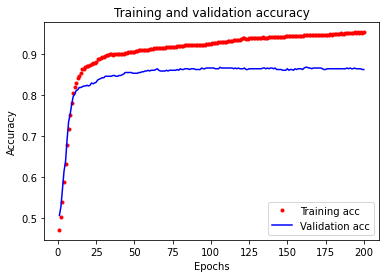

In [129]:
plt.clf()
plt.plot(epochs, average_acc, "r.", label="Training acc")
plt.plot(epochs, average_val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [241]:
## methode du cours

In [252]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

NameError: name 'train_labels' is not defined

In [253]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

NameError: name 'train_labels' is not defined

In [254]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [255]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [256]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

NameError: name 'x_train' is not defined

In [257]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

NameError: name 'partial_x_train' is not defined

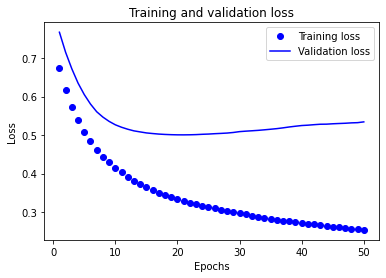

In [258]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

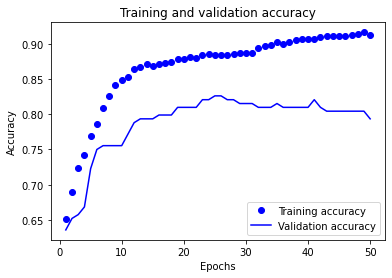

In [259]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [260]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

NameError: name 'x_train' is not defined

In [261]:
results = model.evaluate(x_test, y_test)

NameError: name 'x_test' is not defined

In [262]:
results = model.evaluate(x_test, y_test)

NameError: name 'x_test' is not defined

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

In [ ]:
predictions = model.predict(x_test)